In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [15]:
# show indicator tables for AAPL
!ls -lt data/AAPL/

total 3320
-rw-r--r--  1 ppfenning  staff  132433 Aug 17 18:25 PLUSDM.parquet
-rw-r--r--  1 ppfenning  staff  132438 Aug 17 18:25 MINUSDM.parquet
-rw-r--r--  1 ppfenning  staff  132430 Aug 17 18:24 MINUSDI.parquet
-rw-r--r--  1 ppfenning  staff  132393 Aug 17 18:24 DX.parquet
-rw-r--r--  1 ppfenning  staff   55432 Aug 17 18:24 AROON.parquet
-rw-r--r--  1 ppfenning  staff  132352 Aug 17 18:24 CMO.parquet
-rw-r--r--  1 ppfenning  staff  132398 Aug 17 18:24 MOM.parquet
-rw-r--r--  1 ppfenning  staff  132363 Aug 17 18:23 ADXR.parquet
-rw-r--r--  1 ppfenning  staff  132379 Aug 17 18:23 ADX.parquet
-rw-r--r--  1 ppfenning  staff   74767 Aug 17 18:23 WILLR.parquet
-rw-r--r--  1 ppfenning  staff  132398 Aug 17 18:23 RSI.parquet
-rw-r--r--  1 ppfenning  staff  118017 Aug 17 18:23 STOCHRSI.parquet
-rw-r--r--  1 ppfenning  staff  147391 Aug 17 18:23 STOCH.parquet


In [16]:
from algo_trader.gen_functions import get_ticker_df
# create df from parquets 
# using days over last 1200 weeks (approximately the turn of the century from current time)
aapl = get_ticker_df('PSTG')

In [17]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
mom,8401.0,2014.673502,7392.376150,-2.817406e+04,0.931451,25.702750,690.407791,74856.205758
adxr,8401.0,46.170709,15.248281,0.000000e+00,33.949837,43.353794,56.114303,99.117180
cmo,8401.0,49.588852,49.104379,-9.615282e+01,17.205737,65.076250,92.137652,99.999985
rsi,8401.0,73.913270,25.217870,0.000000e+00,56.517765,81.607925,96.279820,100.000000
minusdi,8401.0,14.238124,6.435801,0.000000e+00,9.499714,14.292745,19.048058,28.188079
adx,8401.0,44.814734,15.925663,0.000000e+00,32.135184,41.988080,55.233035,95.857178
slowd,8401.0,61.488379,19.576879,0.000000e+00,48.019635,64.578969,77.124003,93.130178
slowk,8401.0,61.484884,20.923131,0.000000e+00,46.277094,66.748707,78.014849,93.130178
minusdm,8401.0,1073.930377,2411.365760,0.000000e+00,4.387313,46.113299,734.515175,18254.155260
dx,8401.0,45.573494,26.120834,0.000000e+00,23.813293,45.115841,66.486114,99.748036


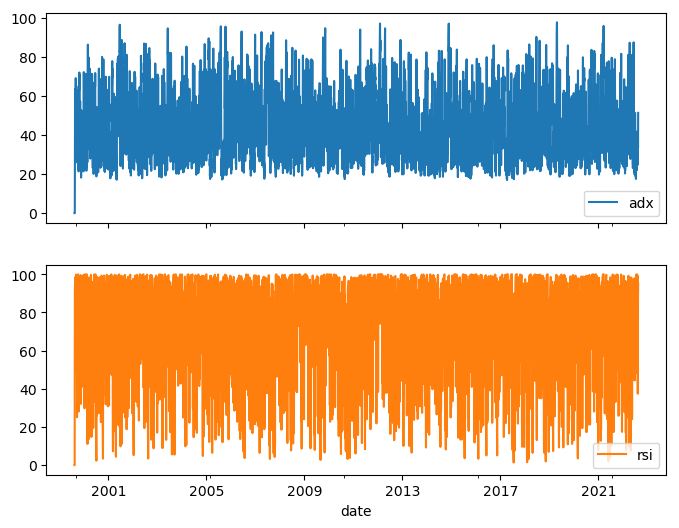

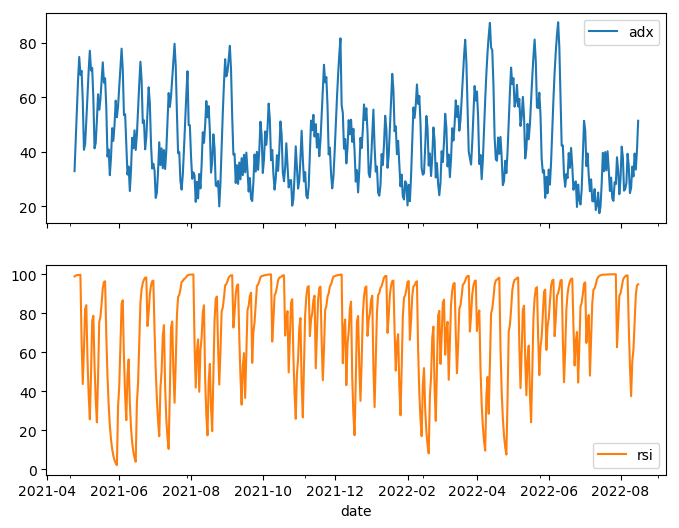

In [6]:
plot_cols = ['adx', 'rsi']
plot_features = aapl[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = aapl[plot_cols][-480:]
plot_features.index = aapl.index[-480:]
_ = plot_features.plot(subplots=True)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

2022-08-17 18:31:44.171313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type datetime.date).